In [1]:
import qiskit as q

In [2]:
X = q.QuantumRegister(3, "x")
J = q.QuantumRegister(3, "j")
A = q.QuantumRegister(9, "a")
R = q.QuantumRegister(1, "r")

In [3]:
cx = q.ClassicalRegister(3)
cj = q.ClassicalRegister(3)
ca = q.ClassicalRegister(9)
cr = q.ClassicalRegister(1)

In [4]:
c = q.QuantumCircuit(X, J, A, R)

Setup x

In [5]:
c.h(X[0])
c.h(X[1])
c.h(X[2])

Setup J

In [6]:
c.h(J[0])
c.x(J[2])

$$
\begin{align*}
    A_0 &= (X_0 == J_0) = \neg ( X_0 \oplus J_0)\\
    A_1 &= (X_0 > J_0) =  X_0 \wedge(\neg J_0)\\
    A_2 &= (X_1 == J_1)\\
    A_3 &= (X_1 > J_1)\\
    A_4 &= (X_2 \ge J_2) = X_2 \vee (\neg J_2) = \neg((\neg X_2) \wedge J_2)\\
    A_5 &= A_0 \wedge A_3\\
    A_6 &= A_0 \wedge A_2\\
    A_7 &= A_6 \wedge A_4\\
    A_8 &= A_1 \vee A_5 = \neg((\neg A_1) \wedge (\neg A_5))\\
    A_9 &= A_8 \vee A_7 = X > J\\
\end{align*}
$$

In [7]:
c.barrier()

# A0 = (X0 == J0)
c.cx(X[0], A[0])
c.cx(J[0], A[0])
c.x(A[0])

c.barrier()

# A1 = (X0 > J0)
c.x(J[0])
c.ccx(X[0],J[0], A[1])
c.x(J[0])

c.barrier()

# A2 = (X1 == J1)
c.cx(X[1], A[2])
c.cx(J[1], A[2])
c.x(A[2])

c.barrier()

# A3 = (X1 > J1)
c.x(J[1])
c.ccx(X[1],J[1], A[3])
c.x(J[1])

c.barrier()

# A4 = (X2 >= J2)
c.x(A[4])
c.x(X[2])
c.ccx(X[2],J[2], A[4])
c.x(X[2])

c.barrier()

# A5 = A0 && A3
c.ccx(A[0], A[3], A[5])

c.barrier()

# A6 = A0 && A2
c.ccx(A[0], A[2], A[6])

c.barrier()

# A7 = A6 && A4
c.ccx(A[6], A[4], A[7])

c.barrier()

# A8 = A1 || A5
c.x(A[1])
c.x(A[5])
c.x(A[8])
c.ccx(A[1], A[5], A[8])
c.x(A[1])
c.x(A[5])

c.barrier()

# R = A8 || A7
c.x(A[8])
c.x(A[7])
c.x(R[0])
c.ccx(A[8], A[7], R[0])
c.x(A[8])
c.x(A[7])


In [8]:
c.draw(output="mpl")

<Figure size 1923.06x2784.25 with 1 Axes>

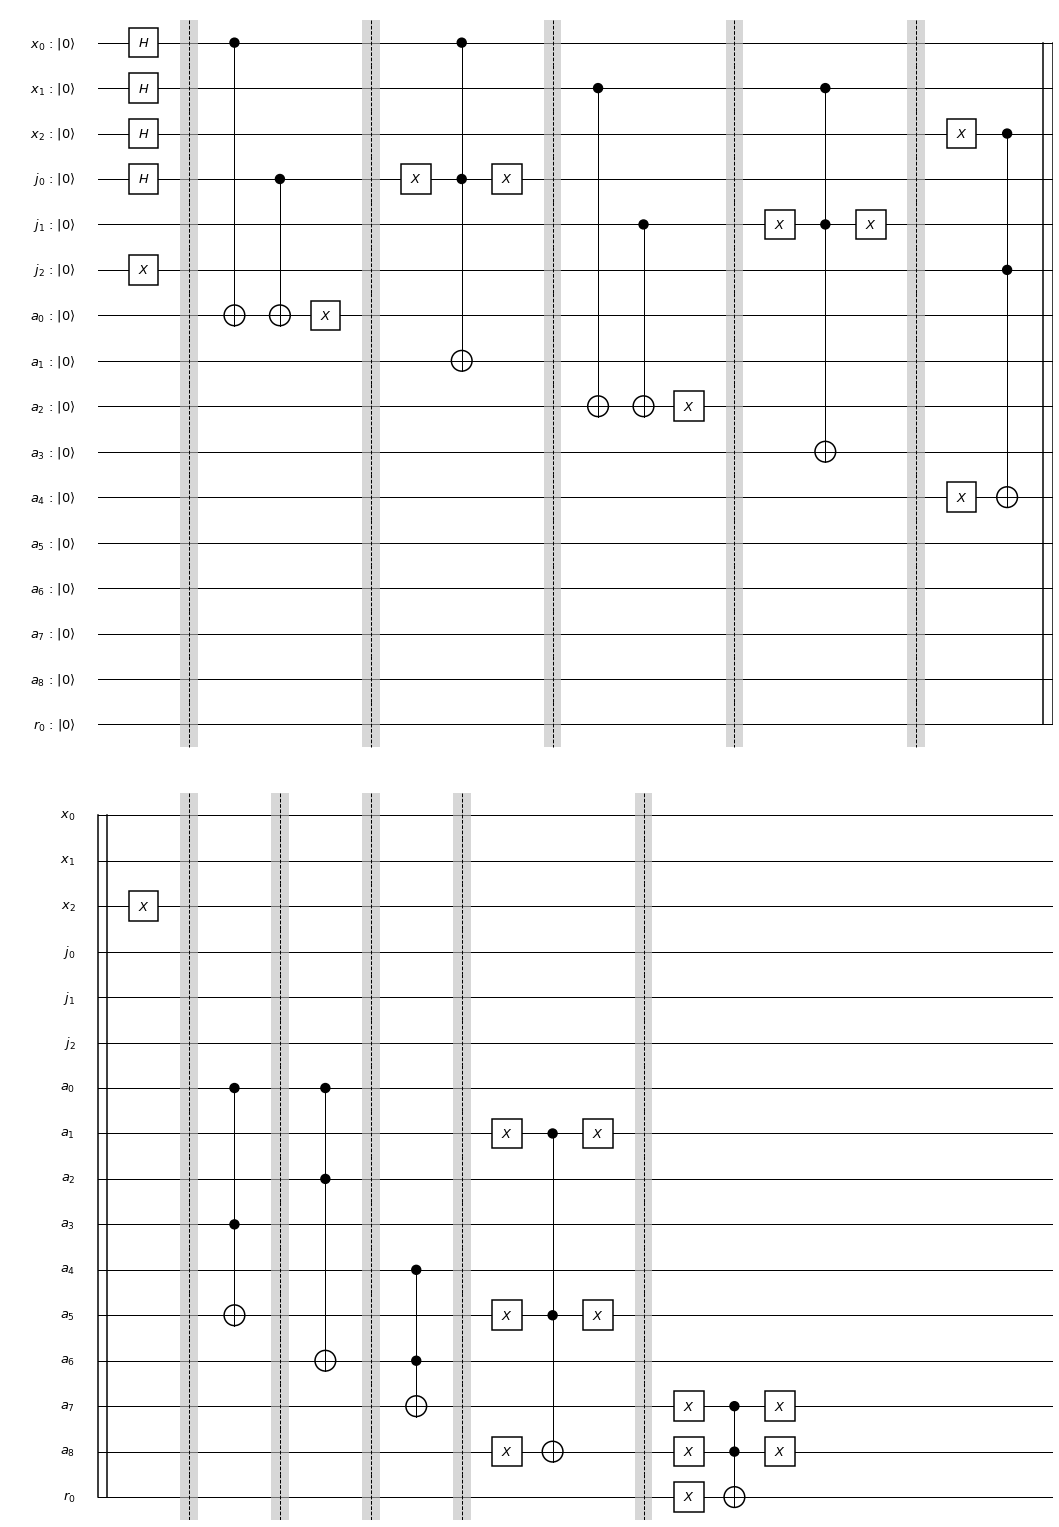

In [9]:
c.draw(output="mpl")

In [ ]:
print(c.draw(output="latex_source"))

In [10]:
c.add_register(cx)
c.add_register(cj)
c.add_register(ca)
c.add_register(cr)

In [11]:
c.measure(X, cx)
c.measure(J, cj)
c.measure(A, ca)
c.measure(R, cr)

In [12]:
backend_sim = q.BasicAer.get_backend('qasm_simulator')
qobj = q.compiler.transpile(c)
results = q.execute(qobj, backend_sim).result().get_counts(c)

In [13]:
results

{'0 000010100 101 100': 61,
 '1 100111001 100 110': 65,
 '0 000000100 101 000': 53,
 '0 000001000 101 010': 69,
 '1 100101001 100 010': 78,
 '1 100101001 101 011': 64,
 '0 001000101 100 000': 73,
 '1 100011010 100 111': 63,
 '1 100000110 100 001': 55,
 '1 100010110 100 101': 57,
 '1 100111001 101 111': 59,
 '1 011010101 100 100': 63,
 '1 100001010 100 011': 66,
 '0 000011000 101 110': 58,
 '0 001000101 101 001': 66,
 '1 011010101 101 101': 74}

In [14]:
[["X", "J", "A", "R"]] + sorted([x[::-1].split(" ") for x in results.keys()])

[['X', 'J', 'A', 'R'],
 ['000', '001', '101000100', '0'],
 ['000', '101', '001000000', '0'],
 ['001', '001', '101010110', '1'],
 ['001', '101', '001010000', '0'],
 ['010', '001', '100101001', '1'],
 ['010', '101', '000100000', '0'],
 ['011', '001', '100111001', '1'],
 ['011', '101', '000110000', '0'],
 ['100', '001', '011000001', '1'],
 ['100', '101', '101000100', '0'],
 ['101', '001', '011010001', '1'],
 ['101', '101', '101010110', '1'],
 ['110', '001', '010100001', '1'],
 ['110', '101', '100101001', '1'],
 ['111', '001', '010110001', '1'],
 ['111', '101', '100111001', '1']]

# Debug

In [16]:
def print_qbit(results, n):
    print("".join(x[2][n] for x in (sorted([x[::-1].split(" ") for x in results.keys()]))))

In [17]:
# A0 = (X0 == J0)
print_qbit(results, 0)

1010101001010101


In [18]:
# A1 = (X0 > J0)
print_qbit(results, 1)

0000000010101010


In [19]:
# A2 = (X1 == J1)
print_qbit(results, 2)

1111000011110000


In [20]:
# A3 = (X1 > J1)
print_qbit(results, 3)

0000111100001111


In [21]:
# A4 = (X2 > J2)
print_qbit(results, 4)

0011001100110011


In [22]:
# A5 = A0 && A3
print_qbit(results, 5)

0000101000000101


In [23]:
# A6 = A0 && A2
print_qbit(results, 6)

1010000001010000


In [24]:
# A7 = A6 && A4
print_qbit(results, 7)

0010000000010000


In [25]:
# A8 = A1 || A5
print_qbit(results, 8)

0000101010101111
